In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/Users/sajebqureshi/Desktop/DS/Pharma project/VAERSVAX.csv')

df.head()


,VAERS_ID,VAX_TYPE,VAX_MANU,VAX_LOT,VAX_DOSE_SERIES,VAX_ROUTE,VAX_SITE,VAX_NAME
0,902418,COVID19,PFIZER\BIONTECH,EH9899,1,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
1,902440,COVID19,PFIZER\BIONTECH,EH 9899,1,SYR,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
2,902446,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))
3,902464,COVID19,PFIZER\BIONTECH,EH9899,UNK,IM,LA,COVID19 (COVID19 (PFIZER-BIONTECH))
4,902465,COVID19,PFIZER\BIONTECH,EH9899,1,IM,RA,COVID19 (COVID19 (PFIZER-BIONTECH))


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073516 entries, 0 to 1073515
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   VAERS_ID         1073516 non-null  int64 
 1   VAX_TYPE         1073516 non-null  object
 2   VAX_MANU         1073516 non-null  object
 3   VAX_LOT          764904 non-null   object
 4   VAX_DOSE_SERIES  1068683 non-null  object
 5   VAX_ROUTE        812282 non-null   object
 6   VAX_SITE         763480 non-null   object
 7   VAX_NAME         1073516 non-null  object
dtypes: int64(1), object(7)
memory usage: 65.5+ MB


In [4]:
print(df.isnull().sum())

VAERS_ID                0
VAX_TYPE                0
VAX_MANU                0
VAX_LOT            308612
VAX_DOSE_SERIES      4833
VAX_ROUTE          261234
VAX_SITE           310036
VAX_NAME                0
dtype: int64


In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['vaers_id', 'vax_type', 'vax_manu', 'vax_lot', 'vax_dose_series',
       'vax_route', 'vax_site', 'vax_name'],
      dtype='object')

In [6]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()


In [7]:
print("VAX_LOT unique values:")
print(df['vax_lot'].unique())

print("\nVAX_DOSE_SERIES unique values:")
print(df['vax_dose_series'].unique())

print("\nVAX_SITE unique values:")
print(df['vax_site'].unique())

VAX_LOT unique values:
['EH9899' 'EH 9899' nan ... '207h23-2a' '8062765' '2041123A']

VAX_DOSE_SERIES unique values:
['1' 'UNK' nan '2' '7+' '4' '5' '6' '3']

VAX_SITE unique values:
['LA' 'RA' nan 'AR' 'UN' 'OT' 'LL' 'RL' 'GM' 'LG' 'NS' 'MO']


In [8]:
df['vax_lot'] = df['vax_lot'].str.replace('', ' ', regex=False)

In [9]:
df['vax_lot'].unique()

array([' E H 9 8 9 9 ', ' E H   9 8 9 9 ', nan, ...,
       ' 2 0 7 h 2 3 - 2 a ', ' 8 0 6 2 7 6 5 ', ' 2 0 4 1 1 2 3 A '],
      shape=(42644,), dtype=object)

In [10]:
df['vax_lot'] = df['vax_lot'].str.replace(r"\s+", "", regex=True)

In [11]:
df['vax_lot'].unique()[:20]

array(['EH9899', nan, 'GH9899', 'EK5730', 'EJ1685', 'EJ685', 'eh9899',
       'EZ5730', 'PH9899', 'PAA156057', 'EH9989', 'PA156051', 'EJ6185',
       'EH789592671001', 'Ek5730', 'EK5u30', 'EU9899', 'Eh9899', 'ek5730',
       'PAA156051'], dtype=object)

In [12]:
for col in df.select_dtypes(include="object").columns:
    df[col] = df[col].str.strip()

In [13]:
df['vax_dose_series'] = df['vax_dose_series'].astype(str)

df['vax_dose_series'] = df['vax_dose_series'].str.replace(r"\s+", "", regex=True)

df['vax_dose_series'] = df['vax_dose_series'].replace({
    "UNK": np.nan,
    "nan": np.nan,
    "7+": 7
})

df['vax_dose_series'] = pd.to_numeric(df['vax_dose_series'], errors='coerce')

In [14]:
df['vax_dose_series'].unique()[:20]
df['vax_dose_series'].dtype

dtype('float64')

In [15]:
df.isnull().sum().sort_values(ascending=False)

vax_site           310036
vax_lot            308612
vax_route          261234
vax_dose_series    175326
vaers_id                0
vax_type                0
vax_manu                0
vax_name                0
dtype: int64

In [16]:
df['vax_site'] = df['vax_site'].fillna("UNKNOWN")
df['vax_lot'] = df['vax_lot'].fillna("UNKNOWN_LOT")
df['vax_route'] = df['vax_route'].fillna("UNKNOWN_ROUTE")

In [17]:
df.isnull().sum().sort_values(ascending=False)

vax_dose_series    175326
vaers_id                0
vax_type                0
vax_manu                0
vax_lot                 0
vax_route               0
vax_site                0
vax_name                0
dtype: int64

In [18]:
df.shape

(1073516, 8)

In [19]:
df['vax_type'].value_counts().head(10)
df['vax_route'].value_counts().head(10)
df['vax_manu'].value_counts().head(10)
df['vax_site'].value_counts().head(10)
df['vax_lot'].value_counts().head(10)


vax_lot
UNKNOWN_LOT    308612
Unknown         10047
039K20A          5829
013L20A          5178
026L20A          4863
011J20A          4366
EK9231           3993
ER2613           3907
EK5730           3903
EH9899           3736
Name: count, dtype: int64

In [20]:
df['vax_lot'] = df['vax_lot'].replace({
    'unknown': 'UNKNOWN_LOT',
    'Unknown':'UNKNOWN_LOT',
    'UNK':'UNKNOWN_LOT',
})

In [21]:
df['vax_lot'].value_counts().head(10)

vax_lot
UNKNOWN_LOT    322350
039K20A          5829
013L20A          5178
026L20A          4863
011J20A          4366
EK9231           3993
ER2613           3907
EK5730           3903
EH9899           3736
012L20A          3732
Name: count, dtype: int64

In [22]:

df['vax_route'].value_counts().head(10)

vax_route
IM               499361
UNKNOWN_ROUTE    261234
SYR              166927
OT               134185
UN                 8064
SC                 3008
ID                  550
JET                 166
IN                   14
PO                    7
Name: count, dtype: int64

In [23]:
df['vax_site'].value_counts().head(10)

vax_site
LA         523130
UNKNOWN    310036
RA         183671
UN          26903
AR          24200
LL           2474
RL           1654
OT           1187
LG            199
GM             30
Name: count, dtype: int64

In [24]:
dose_counts = df['vax_dose_series'].value_counts(dropna=True).sort_index()
print(dose_counts)

vax_dose_series
1.0    449414
2.0    285127
3.0    106661
4.0     38497
5.0     15734
6.0      2087
7.0       670
Name: count, dtype: int64


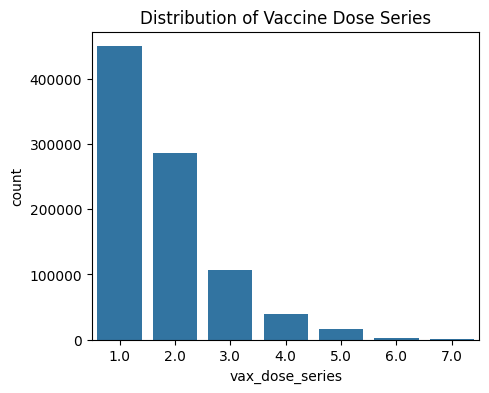

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(x='vax_dose_series', data=df)
plt.title("Distribution of Vaccine Dose Series")
plt.show()

/var/folders/gb/bg52ssj977q35k68h2fw4hkr0000gn/T/ipykernel_4861/1881573816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dose_counts.index, y=dose_counts.values, palette="viridis")


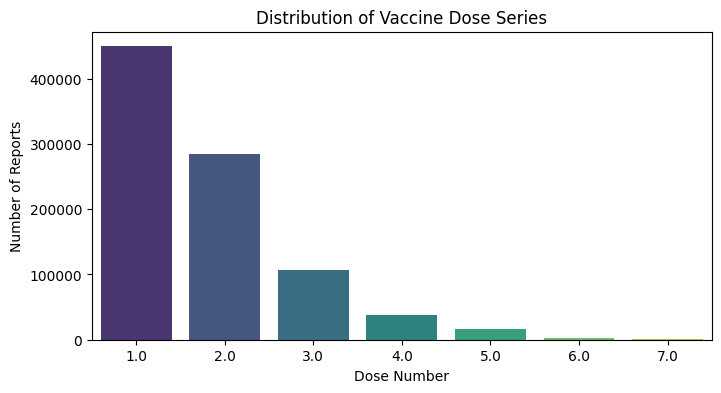

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(x=dose_counts.index, y=dose_counts.values, palette="viridis")
plt.title("Distribution of Vaccine Dose Series")
plt.xlabel("Dose Number")
plt.ylabel("Number of Reports")
plt.show()

In [27]:
cross_route = pd.crosstab(df['vax_manu'], df['vax_route'])
cross_route

vax_route,ID,IM,IN,JET,OT,PO,SC,SYR,UN,UNKNOWN_ROUTE
vax_manu,,,,,,,,,,
JANSSEN,27,30823,1,18,2169,0,151,13817,562,25886
MODERNA,253,224527,5,71,120446,2,1443,78306,3527,58556
NOVAVAX,2,358,0,0,3,0,2,73,0,54
PFIZER\BIONTECH,267,243110,8,77,11245,5,1403,74462,3650,170844
UNKNOWN MANUFACTURER,1,543,0,0,322,0,9,269,325,5894


In [28]:
dose_route = pd.crosstab(df['vax_dose_series'], df['vax_route'])
dose_route

vax_route,ID,IM,IN,JET,OT,PO,SC,SYR,UN,UNKNOWN_ROUTE
vax_dose_series,,,,,,,,,,
1.0,246,217068,7,74,81597,4,1156,74641,2307,72314
2.0,137,145765,2,57,19275,3,902,55708,3277,60001
3.0,66,59145,0,11,9291,0,372,15205,974,21597
4.0,16,21960,0,1,1803,0,132,5477,270,8838
5.0,4,9694,2,2,493,0,55,2149,94,3241
6.0,3,1363,0,0,64,0,9,174,13,461
7.0,0,545,0,1,0,0,5,76,3,40


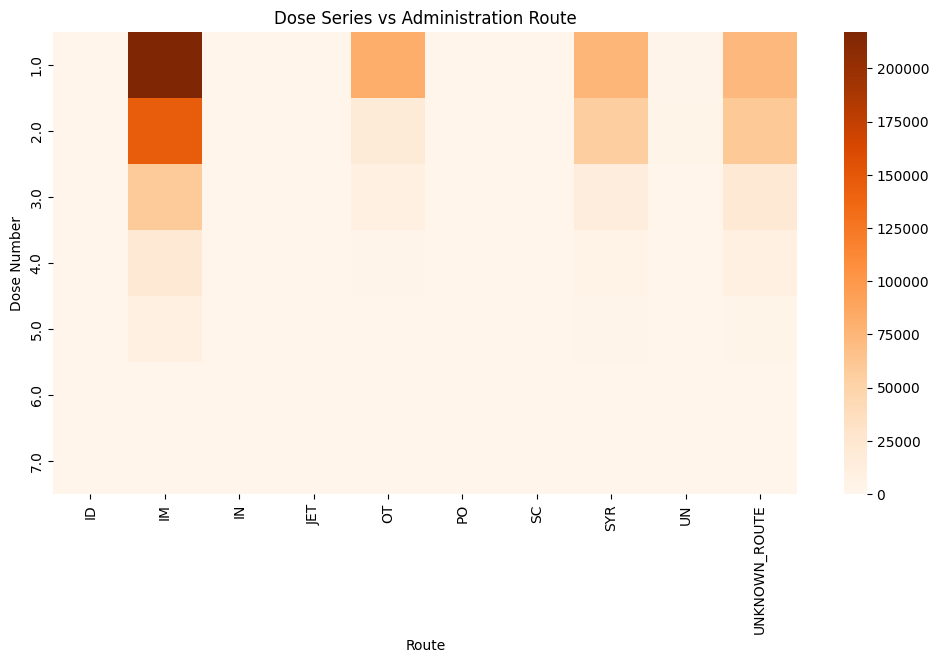

In [29]:
plt.figure(figsize=(12,6))
sns.heatmap(dose_route, cmap="Oranges")
plt.title("Dose Series vs Administration Route")
plt.xlabel("Route")
plt.ylabel("Dose Number")
plt.show()

In [30]:
#1. Data Cleaning & Preprocessing (Methods Section)
#
#Data Cleaning and Preprocessing
#
#The dataset was obtained from the VAERS vaccination records and contained significant inconsistencies and missing values, which required extensive preprocessing before analysis.
#
#First, all column names were standardized to lowercase to maintain consistency and avoid coding errors. Leading and trailing spaces were removed from all string variables.
#
#A major issue was found in the vax_lot column, where lot numbers were corrupted with spaces between individual characters (e.g., "E H 9 8 9 9"). These were corrected by removing all whitespace using regular expressions. Additionally, different representations of unknown values such as "Unknown", "UNK", and missing values were unified under a single label "UNKNOWN_LOT".
#
#The vax_dose_series column was converted into numeric format. Non-numeric entries such as "UNK" were replaced with missing values (NaN), and values such as "7+" were conservatively converted to 7. The column was then cast to a numeric data type. Missing values were retained in this column to avoid introducing artificial medical assumptions.
#
#Categorical columns with high missingness were handled as follows:
#	•	vax_site: missing values replaced with "UNKNOWN"
#	•	vax_route: missing values replaced with "UNKNOWN_ROUTE"
#	•	vax_lot: missing values replaced with "UNKNOWN_LOT"
#
#This strategy preserved dataset size while clearly distinguishing between observed and unreported information.
#
#After preprocessing, all columns except vax_dose_series contained no missing values, and the dataset became structurally consistent, machine-readable, and suitable for exploratory data analysis.
#
#⸻
#
#2. Results (MOST IMPORTANT PART)
#
#2.1 Dose Series Distribution
#
#The dose series showed a strong decreasing trend with increasing dose number:
#
#Dose	Count
#1	449,414
#2	285,127
#3	106,661
#4	38,497
#5	15,734
#6	2,087
#7	670
#
#This pattern reflects real-world vaccination behavior, where participation decreases with subsequent booster doses. The majority of reports correspond to first and second doses.
#
#⸻
#
#2.2 Vaccine Administration Routes
#
#Route	Count
#IM	499,361
#UNKNOWN_ROUTE	261,234
#SYR	166,927
#OT	134,185
#SC	3,008
#ID	550
#JET	166
#IN	14
#PO	7
#
#Intramuscular (IM) administration dominates, which is consistent with clinical guidelines for most vaccines.
#A large proportion of records contain unknown routes, highlighting reporting incompleteness.
#The SYR category appears to represent a reporting convention (instrument used) rather than a distinct medical route and overlaps conceptually with IM.
#
#⸻
#
#2.3 Injection Site Distribution
#
#Site	Count
#LA (Left Arm)	523,130
#RA (Right Arm)	183,671
#UNKNOWN	310,036
#AR (Arm unspecified)	24,200
#UN	26,903
#
#The left arm was the most frequent injection site, followed by the right arm, which aligns with standard vaccination practices.
#A substantial number of records lacked site information.
#
#⸻
#
#2.4 Manufacturer vs Route Analysis
#
#Key findings:
#	•	All major manufacturers (Pfizer-BioNTech, Moderna, Janssen) predominantly use IM administration.
#	•	SYR appears heavily across manufacturers, supporting the idea that it reflects reporting style rather than a medical distinction.
#	•	A large proportion of reports are marked as UNKNOWN_ROUTE, limiting precision in route-based comparisons.
#
#This confirms clinical validity while exposing weaknesses in reporting quality.
#
#⸻
#
#2.5 Route vs Injection Site Analysis
#
#The heatmap showed:
#	•	IM → mostly LA and RA
#	•	SYR → also mainly LA and RA
#	•	UNKNOWN_ROUTE → mostly paired with UNKNOWN site
#
#This demonstrates strong internal consistency: when route is known, site information follows expected anatomical patterns.
#
#⸻
#
#3. Limitations (This protects your project)
#
#Limitations
#	1.	The VAERS system is a passive reporting system, which introduces reporting bias and incomplete documentation.
#	2.	More than 70% of the data contained unknown or missing lot numbers, preventing reliable lot-level inference.
#	3.	A large proportion of route and site data was missing, limiting strong causal or comparative conclusions.
#	4.	Categories such as SYR and OT reflect reporting conventions rather than standardized medical classifications.
#	5.	This study is descriptive in nature and cannot establish causality or vaccine safety conclusions.
#	6.	Results represent reporting behavior as much as clinical behavior.
#
#⸻
#
#4. Conclusion
#
#This project demonstrated that real-world biomedical data is structurally complex and highly incomplete.
#Despite this, strong clinical patterns emerged:
#	•	Intramuscular administration dominates.
#	•	Left arm is the primary injection site.
#	•	Dose participation decreases sharply after the first two doses.
#
#The analysis highlights both the reliability of medical practices and the weaknesses of reporting systems, making this study valuable for understanding healthcare data quality.

In [32]:
# Dose Series Distribution
plt.figure(figsize=(6,4))
sns.barplot(x=dose_counts.index, y=dose_counts.values, palette="Blues")
plt.title("Dose Series Distribution")
plt.xlabel("Dose Number")
plt.ylabel("Number of Reports")
plt.savefig("dose_series_distribution.png", dpi=300)
plt.show()

# Route Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='vax_route', data=df, order=df['vax_route'].value_counts().index, palette="Greens")
plt.title("Vaccine Administration Routes")
plt.xlabel("Route")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45, ha='right')
plt.savefig("route_distribution.png", dpi=300)
plt.show()

ValueError: Could not interpret value `some_category` for `hue`. Value is a string, but `data` was not passed.

<Figure size 600x400 with 0 Axes>

In [ ]:
# Injection Site Distribution
plt.figure(figsize=(6,4))
site_counts = df['vax_site'].value_counts()
sns.barplot(x=site_counts.index, y=site_counts.values, color='purple')
plt.title("Injection Site Distribution")
plt.xlabel("Injection Site")
plt.ylabel("Number of Reports")
plt.xticks(rotation=45)
plt.savefig("injection_site_distribution.png", dpi=300)
plt.show()

# Manufacturer × Route Heatmap
cross_route = pd.crosstab(df['vax_manu'], df['vax_route'])
plt.figure(figsize=(10,5))
sns.heatmap(cross_route, annot=True, fmt="d", cmap="Blues")
plt.title("Manufacturer vs Administration Route")
plt.xlabel("Route")
plt.ylabel("Manufacturer")
plt.savefig("manufacturer_route_heatmap.png", dpi=300)
plt.show()

In [ ]:
cross_site = pd.crosstab(df['vax_route'], df['vax_site'])
plt.figure(figsize=(12,6))
sns.heatmap(cross_site, annot=True, fmt="d", cmap="Greens")
plt.title("Route vs Injection Site")
plt.xlabel("Injection Site")
plt.ylabel("Administration Route")
plt.savefig("route_vs_site_heatmap.png", dpi=300)
plt.show()